# Linear Regressing Player Data
### Version 1: 23/08/2023

Using the data from @vaastav (big shout out) - linear regressing the points achieved in a game by a player, based on a selection of inputs that I should have available beforehand. I've got a strong hypothesis on the game outcome!

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn import preprocessing 

In [59]:
years = []
for i in range(0,4):
    j = str(i)
    k = str(i+1)
    years.append("202"+j+"-2"+k)
    print(years)

['2020-21']
['2020-21', '2021-22']
['2020-21', '2021-22', '2022-23']
['2020-21', '2021-22', '2022-23', '2023-24']


In [91]:
all_years = pd.DataFrame()
for year in years:
    url = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/{}/gws/merged_gw.csv".format(year)
    df = pd.read_csv(url)
    df['season'] = int(year[:4])
    all_years = pd.concat([all_years, df]).fillna('')

In [61]:
all_years.dtypes

name                           object
position                       object
team                           object
xP                            float64
assists                         int64
bonus                           int64
bps                             int64
clean_sheets                    int64
creativity                    float64
element                         int64
fixture                         int64
goals_conceded                  int64
goals_scored                    int64
ict_index                     float64
influence                     float64
kickoff_time                   object
minutes                         int64
opponent_team                   int64
own_goals                       int64
penalties_missed                int64
penalties_saved                 int64
red_cards                       int64
round                           int64
saves                           int64
selected                        int64
team_a_score                    int64
team_h_score

In [62]:
all_years.describe()

,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW,season
count,81197.000000,81197.000000,81197.000000,81197.000000,81197.000000,81197.000000,81197.000000,81197.000000,81197.000000,81197.000000,...,81197.000000,81197.000000,81197.000000,8.119700e+04,8.119700e+04,8.119700e+04,81197.000000,81197.000000,81197.000000,81197.000000
mean,1.302170,0.036381,0.095829,5.377612,0.093218,4.201899,338.631119,189.311391,0.459524,0.040211,...,1.501841,4.622646,1.234738,1.769909e+03,1.540244e+04,1.363209e+04,50.372686,0.050408,19.920083,2021.146557
std,2.156842,0.203561,0.463578,9.313480,0.290739,10.074812,198.137147,112.449629,0.950018,0.218873,...,1.353450,12.354056,2.420640,7.156182e+04,6.245252e+04,5.249602e+04,11.895258,0.218787,11.304747,0.919476
min,-3.000000,0.000000,0.000000,-21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,-7.000000,-2.180978e+06,0.000000e+00,0.000000e+00,37.000000,0.000000,1.000000,2020.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,86.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,-1.240000e+03,3.800000e+01,1.120000e+02,44.000000,0.000000,10.000000,2020.000000
50%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,336.000000,192.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,-5.700000e+01,3.660000e+02,9.500000e+02,47.000000,0.000000,21.000000,2021.000000
75%,2.000000,0.000000,0.000000,9.000000,0.000000,1.600000,504.000000,288.000000,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.800000e+01,4.414000e+03,7.014000e+03,54.000000,0.000000,30.000000,2022.000000
max,23.600000,4.000000,3.000000,128.000000,1.000000,136.200000,778.000000,380.000000,9.000000,4.000000,...,9.000000,169.000000,24.000000,1.983733e+06,2.104464e+06,2.233619e+06,141.000000,1.000000,38.000000,2023.000000


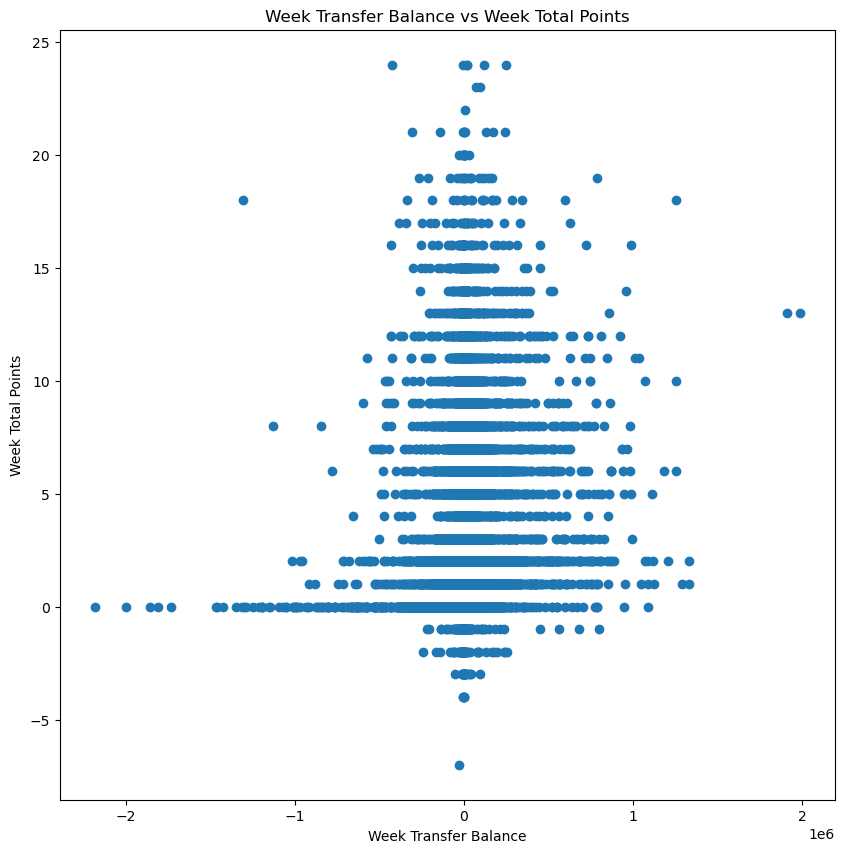

In [63]:
# Checking the correlation of transfer balance and points #
plt.figure(figsize=(10,10))
plt.scatter(all_years['transfers_balance'],all_years['total_points'])
plt.title('Week Transfer Balance vs Week Total Points')
plt.xlabel('Week Transfer Balance')
plt.ylabel('Week Total Points')
plt.show()

<Axes: xlabel='total_points'>

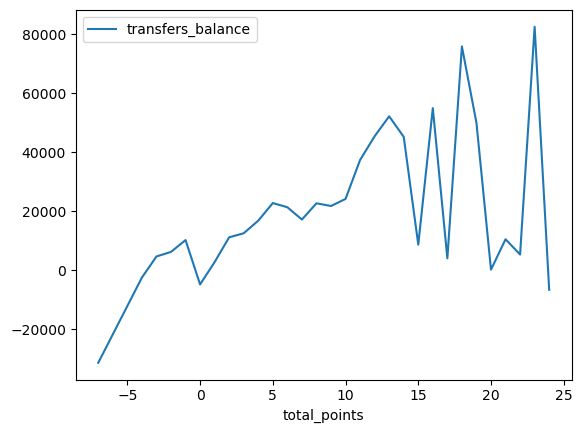

In [64]:
mean_transfers_balance = all_years.groupby(by=["total_points"]).mean(["transfers_balance"])
mean_transfers_balance.plot(y='transfers_balance', use_index=True)

In [108]:
all_years = all_years.sort_values(by=['name', 'season', 'GW'])
all_years.head()

,level_0,index,name,position,team,xP,assists,bonus,bps,clean_sheets,...,was_home,yellow_cards,GW,season,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,starts,GUID
0,0,0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,...,True,0,1,2020,,,,,,Aaron Connolly_Brighton_0 2020\n425 ...
1,1,1,Aaron Connolly,FWD,Brighton,4.0,0,2,27,1,...,False,0,2,2020,,,,,,Aaron Connolly_Brighton_0 2020\n425 ...
2,2,2,Aaron Connolly,FWD,Brighton,2.7,0,0,2,0,...,True,0,3,2020,,,,,,Aaron Connolly_Brighton_0 2020\n425 ...
3,3,3,Aaron Connolly,FWD,Brighton,2.7,0,0,7,0,...,False,0,4,2020,,,,,,Aaron Connolly_Brighton_0 2020\n425 ...
4,4,4,Aaron Connolly,FWD,Brighton,3.0,1,0,13,0,...,False,0,5,2020,,,,,,Aaron Connolly_Brighton_0 2020\n425 ...


In [107]:
####all_years['GUID'] = all_years['name']+'_'+all_years['team']+'_'+str(all_years['season'])+'_'+str(all_years['GW'])
###all_years.set_index('name', inplace=True)

all_years.reset_index(inplace=True)

In [106]:
N = 4
results = all_years.groupby(['name', 'season', 'GW'])['total_points'].rolling(N).mean().shift(-N+1)
all_years['avg_points_next_'+str(N)+'_wks'] = results.droplevel(2)  

TypeError: incompatible index of inserted column with frame index

In [109]:
g = all_years.sort_values(by=['name', 'season', 'GW']).groupby(['name', 'season', 'GW'])['total_points']
all_years['avg_points_next_4_wks'] = g.rolling(4).mean().shift(-4+1)

TypeError: incompatible index of inserted column with frame index